 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [565]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [566]:
#initializing path for csv file
csvpath_whale_returns = Path("Whale_Analysis_Homework/whale_returns.csv")

In [567]:
# Reading whale returns
whale_analysis_df = pd.read_csv(csvpath_whale_returns, index_col = "Date", parse_dates=True)

In [568]:
# Count nulls
whale_analysis_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [569]:
# Drop nulls
whale_analysis_df = whale_analysis_df.dropna().copy()

In [570]:
#displaying df
whale_analysis_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [571]:
#initializing path for csv files
csvpath_algo_returns = Path("Whale_Analysis_Homework/algo_returns.csv")

In [572]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(csvpath_algo_returns, index_col = "Date", parse_dates=True)

In [573]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [574]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()

In [575]:
#displaying df
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [576]:
#initializing path for csv files
csvpath_sp_tsx_history = Path("Whale_Analysis_Homework/sp_tsx_history.csv")

In [577]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_df = pd.read_csv(csvpath_sp_tsx_history, index_col = "Date", parse_dates=True)

In [578]:
# Check Data Types
sp_tsx_history_df["Close"].dtypes

dtype('O')

In [579]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("%", "")

sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype(float)

/Users/coenemmenegger/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [580]:
# Calculate Daily Returns
daily_returns_sptsx = sp_tsx_history_df.pct_change()
daily_returns_sptsx

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [581]:
# Drop nulls
daily_returns_sptsx = daily_returns_sptsx.dropna().copy()
sp_tsx_history_df = sp_tsx_history_df.dropna().copy()

In [582]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sptsx = daily_returns_sptsx.rename(columns = {"Close":"S&P TSX"})
daily_returns_sptsx

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [583]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
concat_portfolio_df = pd.concat([whale_analysis_df, algo_returns_df, daily_returns_sptsx], axis = "columns", join = "inner")
concat_portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [584]:
concat_portfolio_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

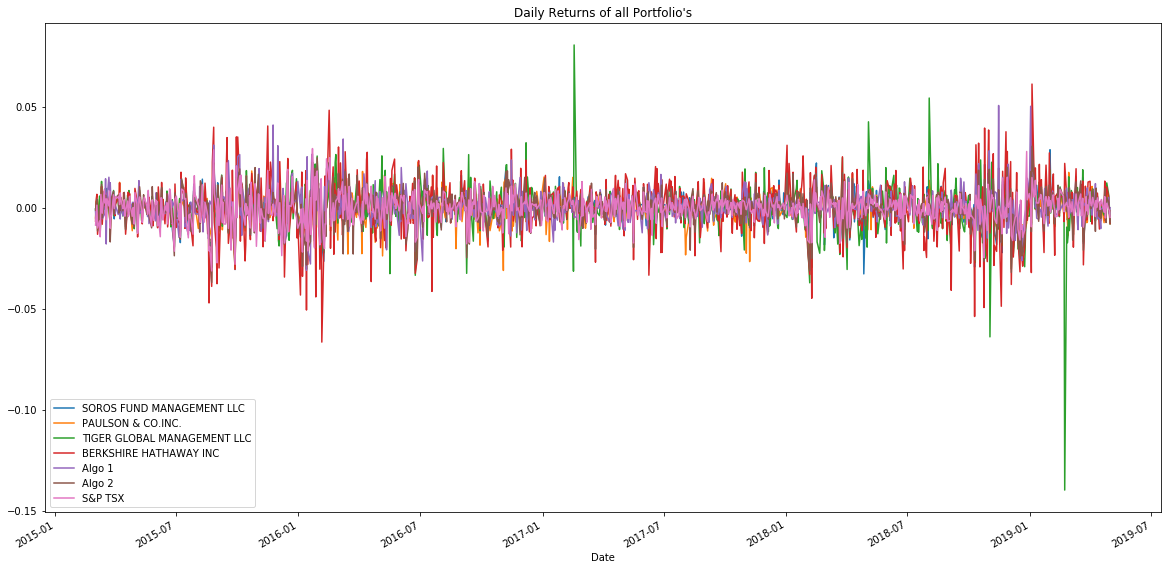

In [585]:
# Plot daily returns of all portfolios
daily_returns_concat = concat_portfolio_df
daily_returns_concat.plot(figsize = [20,10], title = "Daily Returns of all Portfolio's")

#### Calculate and Plot cumulative returns.

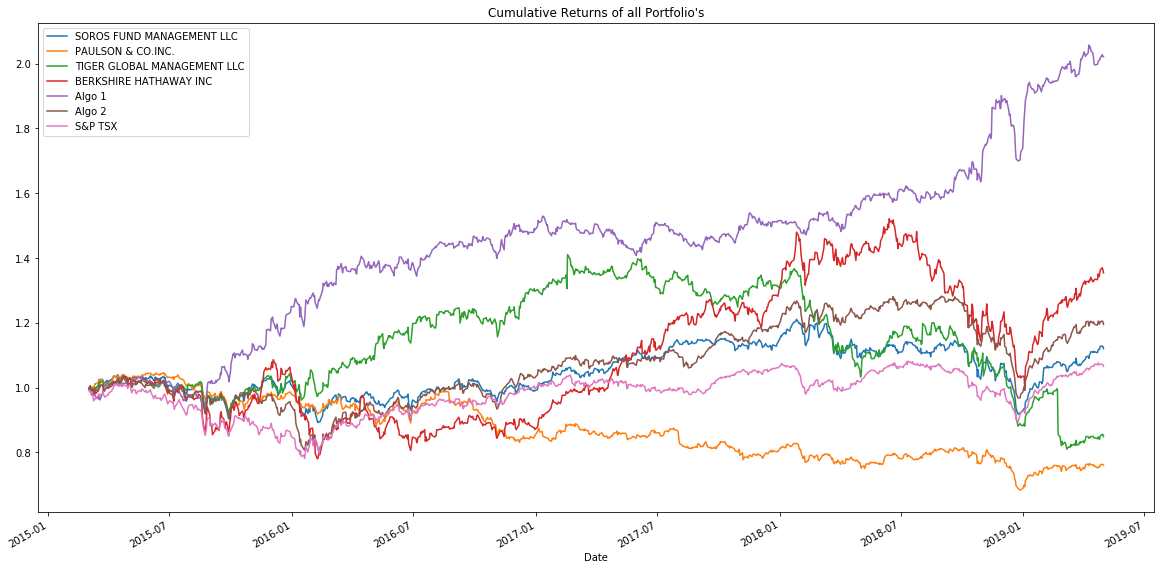

In [586]:
# Calculate cumulative returns of all portfolios
cumulative_returns_concat = (1+ concat_portfolio_df).cumprod()
# Plot cumulative returns
cumulative_returns_concat.plot(figsize = [20,10], title = "Cumulative Returns of all Portfolio's")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


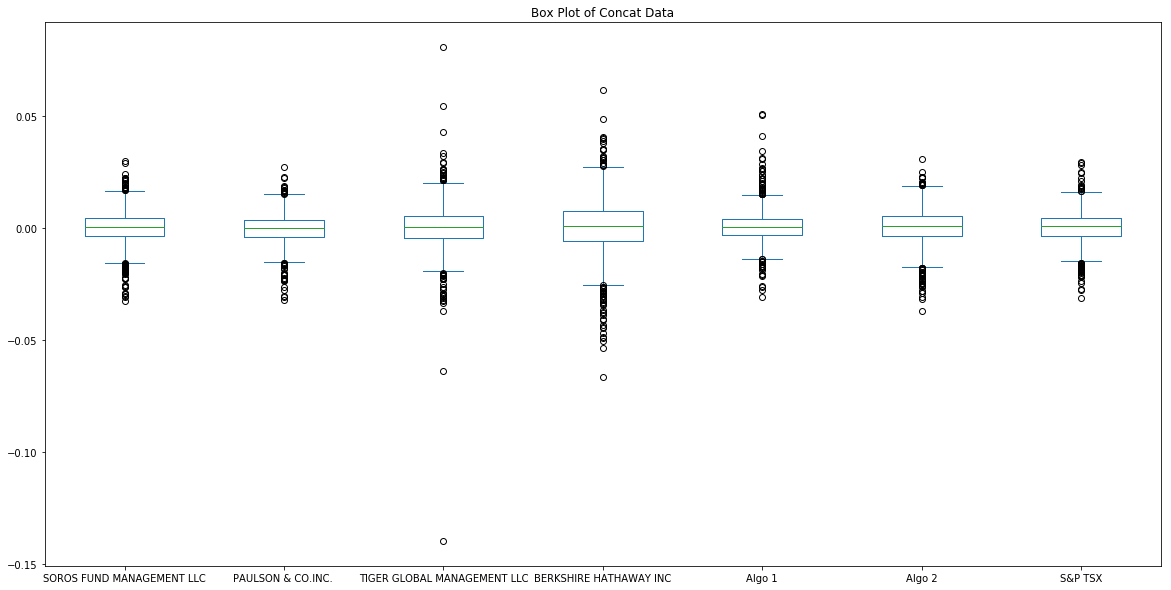

In [587]:
# Box plot to visually show risk
concat_portfolio_df.plot(kind = "box", figsize = [20,10], title = "Box Plot of Concat Data")

### Calculate Standard Deviations

In [588]:
# Calculate the daily standard deviations of all portfolios
daily_concat_std = daily_returns_concat.std()
daily_concat_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [589]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_daily_std = daily_returns_sptsx.std()
sptsx_daily_std

S&P TSX    0.006637
dtype: float64

In [590]:
# Determine which portfolios are riskier than the S&P TSX 60
print("If the variable returns true, the portfolio has a greater risk/reward then the S&P TSX.")
sptsx_daily_std_ = daily_concat_std[-1]
daily_concat_std.to_frame()
daily_concat_std.apply(lambda x : True if x> sptsx_daily_std_ else False)

If the variable returns true, the portfolio has a greater risk/reward then the S&P TSX.


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [591]:
# Calculate the annualized standard deviation (252 trading days)
daily_concat_std_annu = daily_concat_std * np.sqrt(252)
daily_concat_std_annu

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

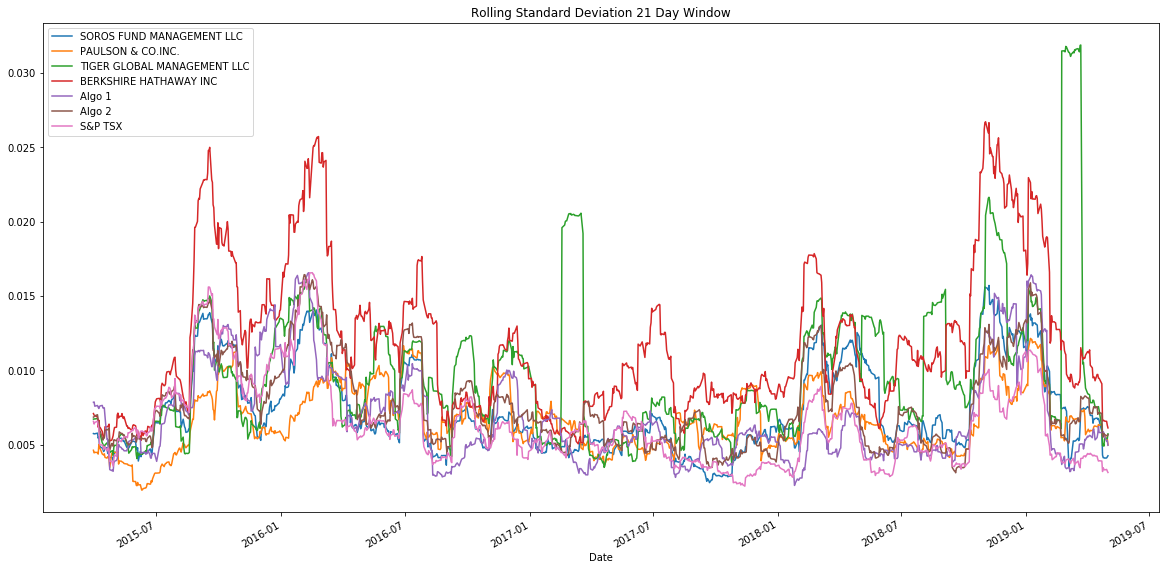

In [592]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
concat_portfolio_rstd = concat_portfolio_df.rolling(window = 21).std()
# Plot the rolling standard deviation
concat_portfolio_rstd.plot(figsize = [20,10], title = "Rolling Standard Deviation 21 Day Window")

### Calculate and plot the correlation

In [593]:
# Calculate the correlation
correlation = concat_portfolio_df.corr()

# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


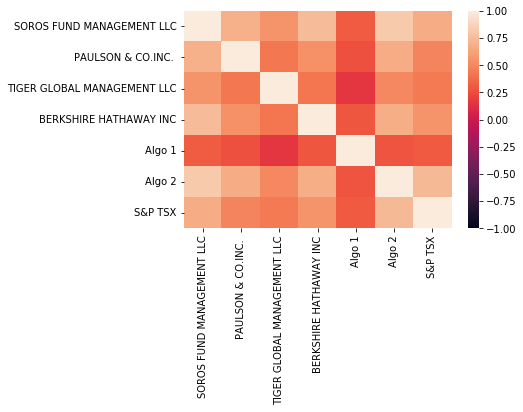

In [594]:
#plotting correlation 
import seaborn as sns
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

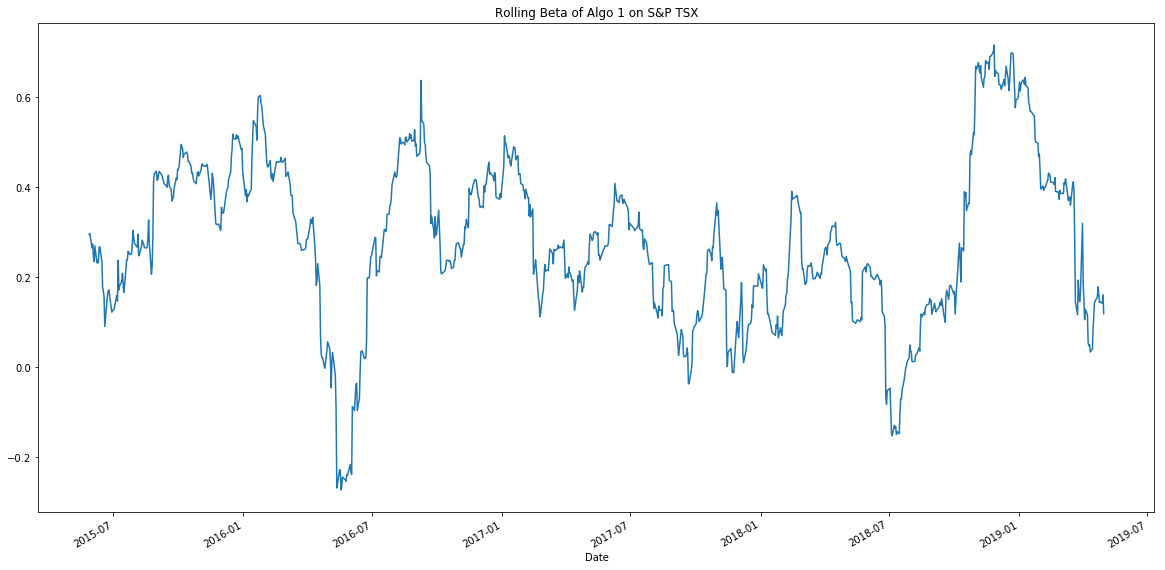

In [595]:
# Calculate covariance of a single portfolio
rolling_covariance = daily_returns_concat["Algo 1"].rolling(window = 60).cov(daily_returns_concat["S&P TSX"])
#covariance 

# Calculate variance of S&P TSX
rolling_variance = daily_returns_concat["S&P TSX"].rolling(window = 60).var()
#variance

# Computing beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta
# Plot beta trend
rolling_beta.plot(figsize = [20,10], title = "Rolling Beta of Algo 1 on S&P TSX")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [596]:
# Use `ewm` to calculate the rolling window
daily_concat_std.ewm(halflife=21)

ExponentialMovingWindow [halflife=21,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [597]:
# Annualized Sharpe Ratios
sharpe_ratios = (concat_portfolio_df.mean() * 252) / (concat_portfolio_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

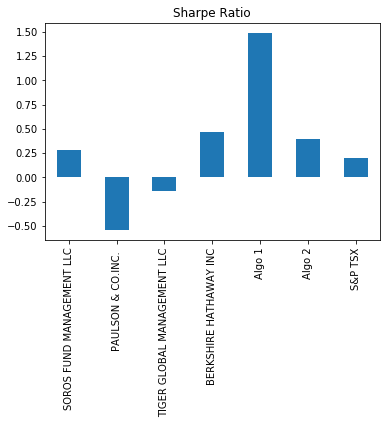

In [598]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 has the highest performing portfolio, while Algo 2 comes in as the third highest performing portfolio just behind the Berkshire 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [599]:
# Reading data from 1st stock
csv_Lpath = Path("Whale_Analysis_Homework/l_historical.csv")
L = pd.read_csv(csv_Lpath, index_col = "Date", parse_dates = True, infer_datetime_format = True)
#L = L.drop(columns = ["Symbol"])
#L = L.dropna()
#L = L.rename(columns = {"Close":"L"})
L

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [600]:
# Reading data from 2nd stock
csv_SHOPpath = Path("Whale_Analysis_Homework/shop_historical.csv")
SHOP = pd.read_csv(csv_SHOPpath, index_col = "Date", parse_dates = True, infer_datetime_format = True)
#SHOP = SHOP.drop(columns = ["Symbol"])
#SHOP = SHOP.dropna()
#SHOP = SHOP.rename(columns = {"Close":"SHOP"})
SHOP

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [601]:
# Reading data from 3rd stock
csv_OTEXpath = Path("Whale_Analysis_Homework/otex_historical.csv")
OTEX = pd.read_csv(csv_OTEXpath, index_col = "Date", parse_dates = True, infer_datetime_format = True)
#OTEX = OTEX.drop(columns = ["Symbol"])
#OTEX = OTEX.dropna()
#OTEX = OTEX.rename(columns = {"Close":"OTEX"})

OTEX

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [602]:
# Combine all stocks in a single DataFrame
Coen_portfolio = pd.concat([L, SHOP, OTEX], axis = "rows", join = "outer")
Coen_portfolio.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [603]:
# Reset Date index
Coen_portfolio.reset_index()
Coen_portfolio

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [604]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
Coen_portfolio = Coen_portfolio.pivot_table(index = "Date", columns = "Symbol", values = "Close")
Coen_portfolio.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [605]:
# Calculate daily returns
daily_returns_custom = Coen_portfolio.pct_change()
# Drop NAs
daily_returns_custom.dropna(inplace = True)
# Display sample data
daily_returns_custom

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [606]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_custom.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [607]:
# Join your returns DataFrame to the original returns DataFrame
final_df = pd.concat([portfolio_returns, concat_portfolio_df], axis = "columns", join = "inner")
i = final_df.columns[0]
final_df = final_df.rename(columns = {i:"Coen's Portfolio"})
final_df.sample(5)

,Coen's Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-03-27,-0.027825,-0.018047,-0.005019,-0.015415,-0.024268,-0.006586,-0.015217,-0.005385
2018-07-05,-0.002997,0.006601,0.005280,0.014716,0.008481,-0.003566,0.007693,-0.002337
2018-01-22,0.012149,0.007716,0.009471,0.007179,0.003236,0.000157,0.007071,-0.000335
2018-08-22,0.003471,0.001132,-0.002784,-0.004095,0.007465,0.007845,0.001792,0.003091
2018-09-12,0.002870,0.002715,0.009984,0.014785,0.003880,0.002799,-0.001786,-0.002810


In [608]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_df.isnull().sum()
final_df.dropna(axis=0, how="any", inplace=True)
final_df

,Coen's Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [609]:
# Calculate the annualized `std`
annu_std_custom = daily_std_custom * np.sqrt(252)
annu_std_custom

,L,SHOP,OTEX
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN
2018-01-04,-16.150971,-4.278486,-10.835298
2018-01-05,-15.874508,-17.225827,17.984604
2018-01-08,-inf,-194.722940,3.421172
...,...,...,...
2019-12-20,-19.332497,-5.768568,-117.282098
2019-12-23,-30.374706,-6.881633,-24.618550
2019-12-24,-15.150594,-152.921746,-6.708668


### Calculate and plot rolling `std` with 21-day window

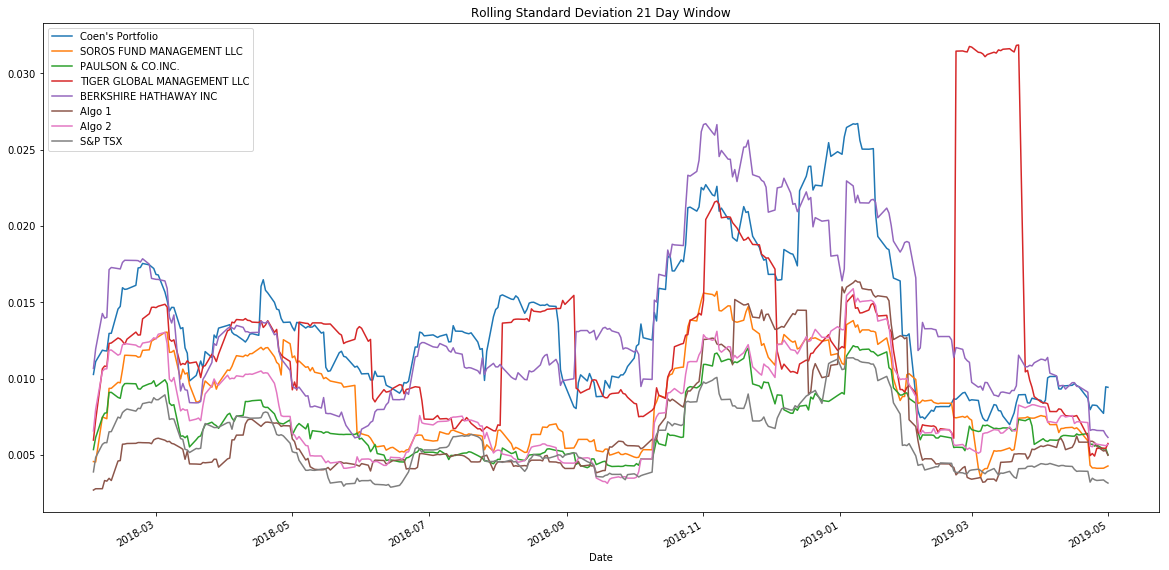

In [610]:
# Calculate rolling standard deviation
final_portfolio_rstd = final_df.rolling(window = 21).std()
# Plot rolling standard deviation
final_portfolio_rstd.plot(figsize = [20,10], title = "Rolling Standard Deviation 21 Day Window")

### Calculate and plot the correlation

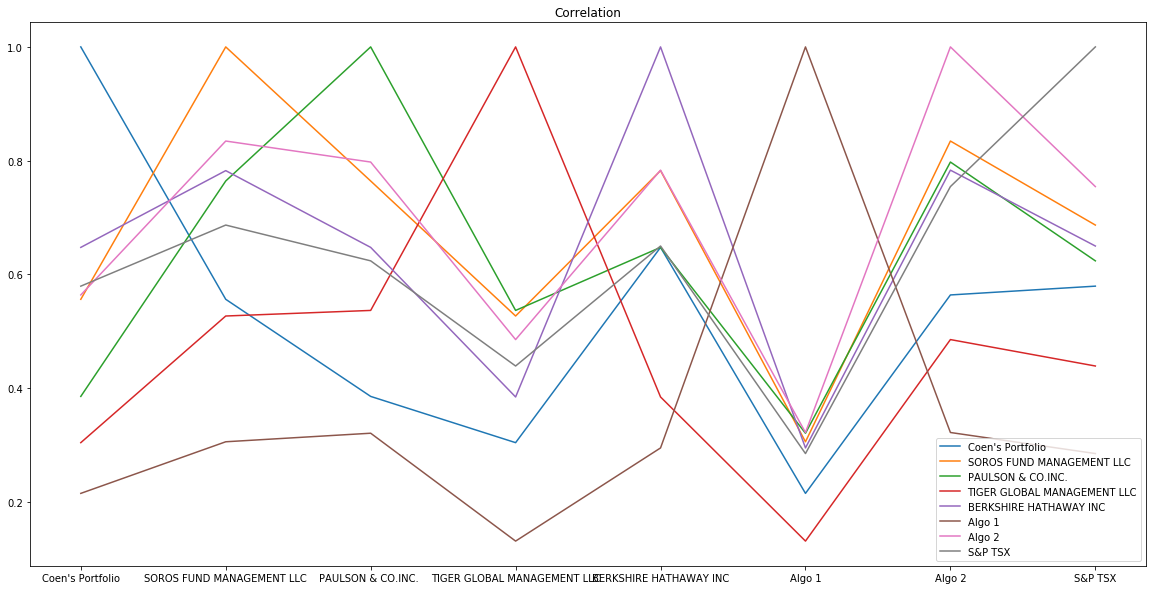

In [611]:
# Calculate and plot the correlation
correlation_final = final_df.corr()
correlation_final.plot(figsize = [20,10], title = "Correlation")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

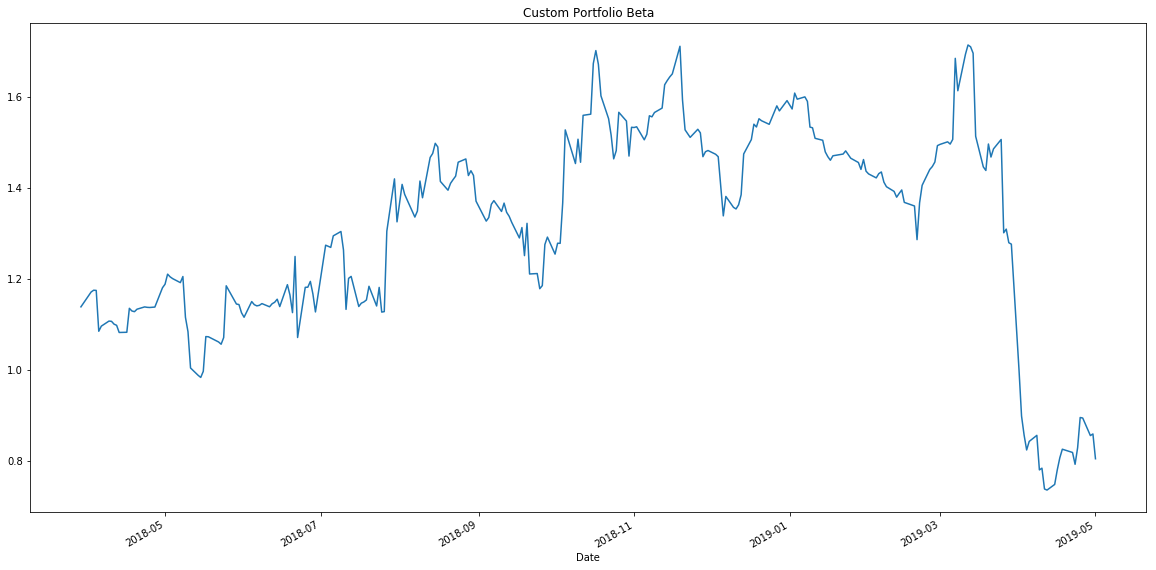

In [612]:
# Calculate and plot Beta
rolling_covariance_all = final_df["Coen's Portfolio"].rolling(window=60).cov(final_df["S&P TSX"])
rolling_variance_all = final_df["S&P TSX"].rolling(window=60).var()
rolling_beta_all = rolling_covariance_all / rolling_variance_all
rolling_beta_all.plot(figsize=(20, 10), title='Custom Portfolio Beta')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [613]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_final = (final_df.mean() * 252) / (final_df.std() * np.sqrt(252))
sharpe_ratios_final

Coen's Portfolio               1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
dtype: float64

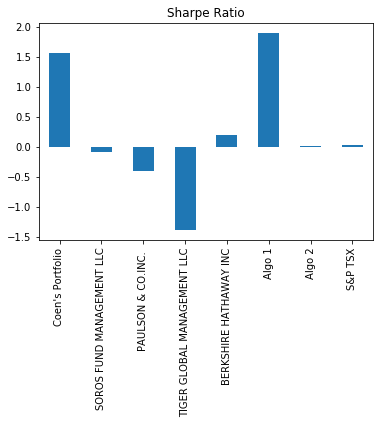

In [614]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_final.plot(kind = "bar", title = "Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

My portfolio performed quite well when compaired to the other portfolios, with Algo 1 still outperforming the rest